In [29]:
import pandas as pd
import numpy as np
import joblib

In [ ]:
train_path='data/trainNC.csv'
test_path='data/testNC.csv'

# Obtener dataset

In [ ]:
df_gen = pd.read_csv('data/TCA_general.csv')
df_T1 = pd.read_csv('data/TCA_T1.csv')
df_T2 = pd.read_csv('data/TCA_T2.csv')

In [32]:
y = df_T2['NIVELRECUPERACION_T2']
y

0      0.85
1       NaN
2      0.35
3      0.90
4       NaN
       ... 
578     NaN
579     NaN
580     NaN
581     NaN
582     NaN
Name: NIVELRECUPERACION_T2, Length: 583, dtype: float64

In [33]:
df = df_T1

In [34]:
df = df.drop(['ID', 'FECHA', 'EDAD', 'DIAGNOSTICO', 'OTROSDIAG', 'FECHAALTA', 'NINGUNOTRODIAG', 'ANSIEDAD', 'DEPRESIÓN', 'TPERSO', 'TBIPOLAR', 'TPSICOTICO', 'OtrosdiagnósticosademásdelTCA_B', 'MEDICACION1', 'MEDICACION2', 'MEDICACION3'], axis=1)
import re

regex = re.compile(r'SEIQOLCUE')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

regex = re.compile(r'SEIRANK')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

regex = re.compile(r'RESI2coment')
df = df.drop(list(filter(regex.search, df.columns)), axis=1)

In [35]:
df['NR_T2'] = y

In [36]:
for column in df.columns:
    df[column] = df[column].replace(' ', '', regex=True).replace('', np.nan).astype(float)

In [37]:
df.dropna(subset=['NR_T2'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [38]:
for column in df_gen.columns:
    df_gen[column] = df_gen[column].replace(' ', '', regex=True).replace('', np.nan)

In [39]:
df_gen[['AÑOSPADECIENDO','AÑOSTTO','EDADCOMIENZO']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AÑOSPADECIENDO  228 non-null    object
 1   AÑOSTTO         224 non-null    object
 2   EDADCOMIENZO    225 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [ ]:
# df['AÑOSPADECIENDO','AÑOSTTO','EDADCOMIENZO'] = df_gen['AÑOSPADECIENDO','AÑOSTTO','EDADCOMIENZO'] PERDERÍA MÁS DE 200 data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 148 entries, WHOQOL1 to NR_T2
dtypes: float64(148)
memory usage: 172.4 KB


In [42]:
df.fillna(2, inplace=True)

In [43]:
df['EDAD'] = df_T1['EDAD'].replace(' ', '', regex=True).replace('', np.nan).astype(float)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Columns: 149 entries, WHOQOL1 to EDAD
dtypes: float64(149)
memory usage: 172.4 KB


C:\Users\a.pikatza\AppData\Local\Temp\ipykernel_16836\3733091737.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['EDAD'] = df_T1['EDAD'].replace(' ', '', regex=True).replace('', np.nan).astype(float)


In [44]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['NR_T2'], axis=1)

# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escala los valores de las características en el rango [0, 1]
X = scaler.fit_transform(X)

# Convertir la matriz X a un DataFrame
df_scaled = pd.DataFrame(X, columns=df.columns[:-1])

# Añadir la columna 'NR_T2' al DataFrame escalado
df_scaled['NR_T2'] = df['NR_T2']

In [45]:
df_scaled['NR_T2'].unique()

array([0.85, 0.35, 0.9 , 0.95, 0.8 , 0.7 , 0.88, 0.5 , 0.82, 0.99, 1.  ,
       0.4 , 0.81, 0.  , 0.79, 0.69, 0.26, 0.49, 0.6 , 0.77, 0.93, 0.3 ,
       0.65, 0.09, 0.58, 0.27, 0.1 , 0.41, 0.55, 0.47, 0.2 , 0.75, 0.08,
       0.25, 0.45, 0.83, 0.05, 0.59, 0.15, 0.39])

In [46]:
from sklearn.model_selection import train_test_split

train_test_ratio = 0.8
df_train, df_test = train_test_split(df_scaled, train_size = train_test_ratio, random_state = 1)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 126 to 37
Columns: 148 entries, WHOQOL1 to NR_T2
dtypes: float64(148)
memory usage: 137.4 KB


In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 100 to 142
Columns: 148 entries, WHOQOL1 to NR_T2
dtypes: float64(148)
memory usage: 34.9 KB


In [49]:
df_train.to_csv(train_path)
df_test.to_csv(test_path)

# Análisis del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Columns: 149 entries, WHOQOL1 to EDAD
dtypes: float64(149)
memory usage: 675.3 KB


In [ ]:
df.dtypes

WHOQOL1         float64
WHOQOL2         float64
WHOQOL3         float64
WHOQOL4         float64
WHOQOL5         float64
                 ...   
RESI_ULTIM23    float64
RESI_ULTIM24    float64
RESI_ULTIM25    float64
NR_T2           float64
EDAD            float64
Length: 149, dtype: object

In [ ]:
df.describe()

,WHOQOL1,WHOQOL2,WHOQOL3,WHOQOL4,WHOQOL5,WHOQOL6,WHOQOL7,WHOQOL8,WHOQOL9,WHOQOL10,...,RESI_ULTIM18,RESI_ULTIM19,RESI_ULTIM20,RESI_ULTIM21,RESI_ULTIM22,RESI_ULTIM23,RESI_ULTIM24,RESI_ULTIM25,NR_T2,EDAD
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,3.803448,3.498276,4.513793,4.389655,3.605172,3.794828,3.682759,3.793103,4.106897,3.636207,...,5.520690,4.686207,4.863793,4.865517,4.037931,4.544828,4.637931,4.317241,16.925862,28.562069
std,0.906314,1.168822,0.844457,0.942141,1.101565,1.233236,1.103948,0.968567,0.844951,0.956967,...,1.803255,1.891208,1.745579,2.076062,1.842300,1.802816,1.880711,2.070280,29.031988,8.418744
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,16.000000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,5.000000,3.000000,4.000000,2.750000,2.000000,3.000000,3.000000,2.000000,2.000000,22.000000
50%,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,6.000000,5.000000,5.000000,6.000000,4.000000,5.000000,5.000000,5.000000,2.000000,26.000000
75%,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,...,7.000000,6.000000,6.000000,7.000000,6.000000,6.000000,6.000000,6.000000,2.000000,34.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,100.000000,71.000000


In [ ]:
df.isna().sum()

WHOQOL1         0
WHOQOL2         0
WHOQOL3         0
WHOQOL4         0
WHOQOL5         0
               ..
RESI_ULTIM23    0
RESI_ULTIM24    0
RESI_ULTIM25    0
NR_T2           0
EDAD            0
Length: 149, dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Columns: 149 entries, WHOQOL1 to EDAD
dtypes: float64(149)
memory usage: 675.3 KB


In [ ]:
df.isna().sum()

WHOQOL1         0
WHOQOL2         0
WHOQOL3         0
WHOQOL4         0
WHOQOL5         0
               ..
RESI_ULTIM23    0
RESI_ULTIM24    0
RESI_ULTIM25    0
NR_T2           0
EDAD            0
Length: 149, dtype: int64

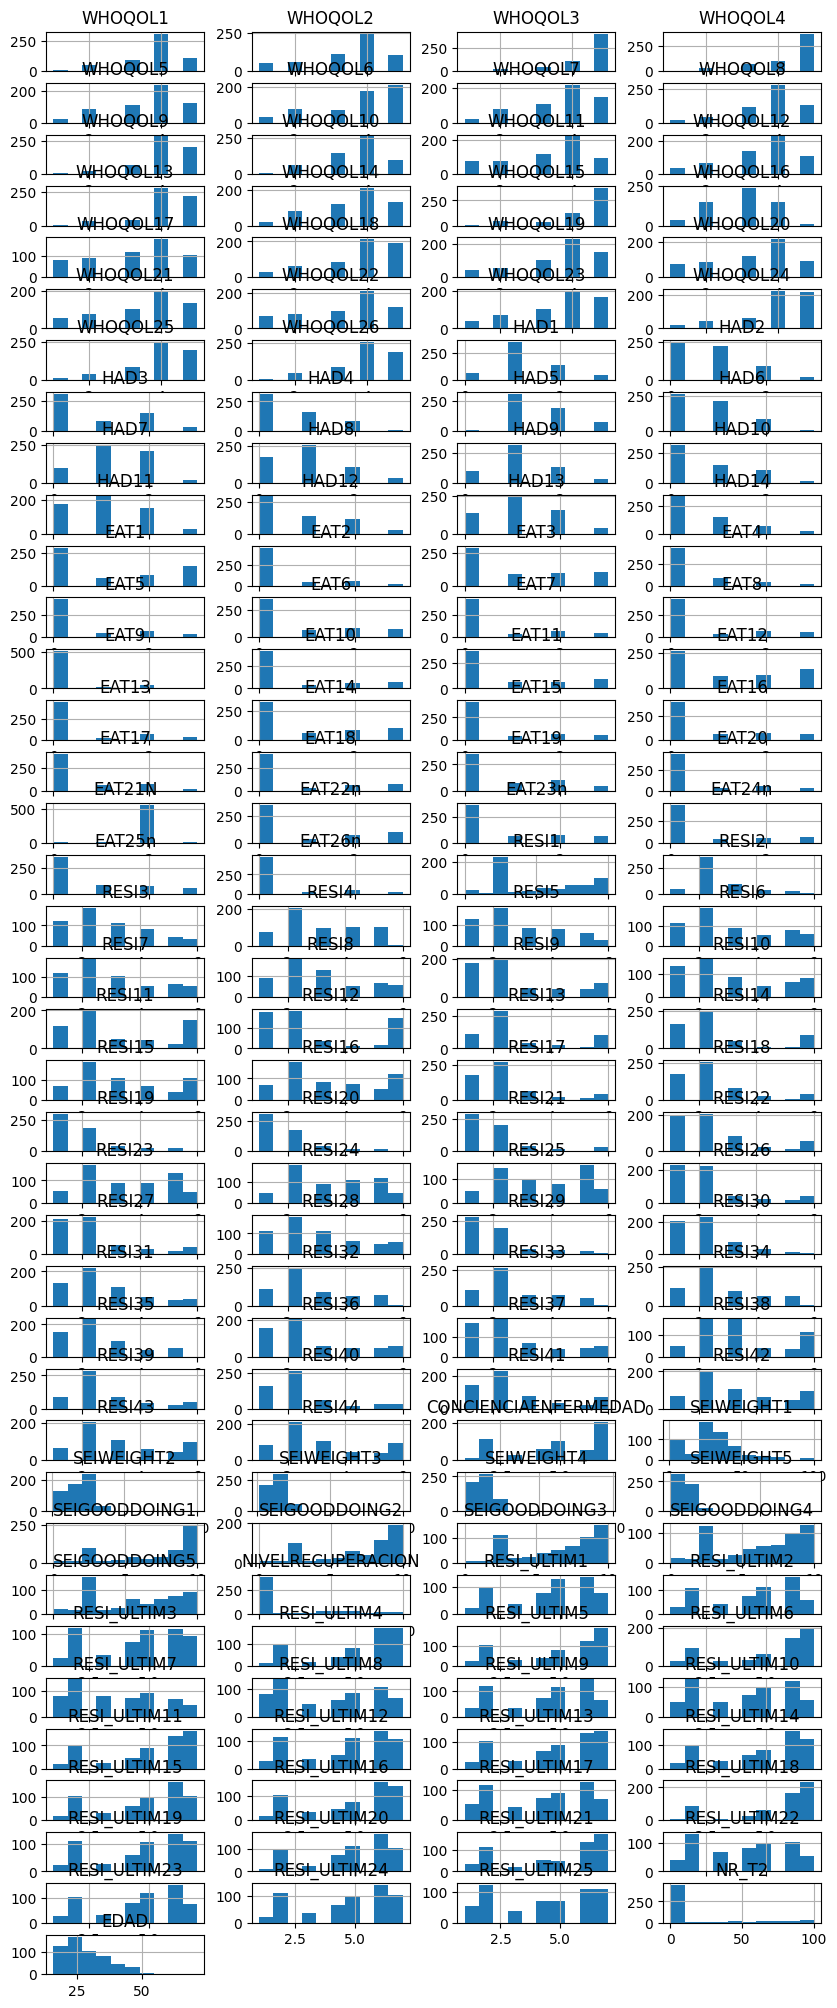

In [ ]:
df.hist(layout=(120, 4), figsize=(10,80));

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Find columns and indices where correlation coefficient is 1 or -1
corr_coeff_1_or_minus_1 = corr_matrix
correlation_pairs = []

# Iterate over the rows of the correlation matrix
for row in corr_coeff_1_or_minus_1.iterrows():
    col = row[0]
    corr_coeff = row[1].dropna()
    for index, value in corr_coeff.items():
        correlation_pairs.append((col, index, value))

# Display the correlated column pairs with correlation coefficient of 1 or -1
for pair in correlation_pairs:
    col1, col2, corr_coeff = pair
    if (corr_coeff > 0.9 or corr_coeff < -0.9) and col1 != col2:
      print("Column '{}' has correlation coefficient {} with column '{}'".format(col1, corr_coeff, col2))


Column 'RESI32' has correlation coefficient 0.9358440414079571 with column 'RESI33'
Column 'RESI33' has correlation coefficient 0.9358440414079571 with column 'RESI32'


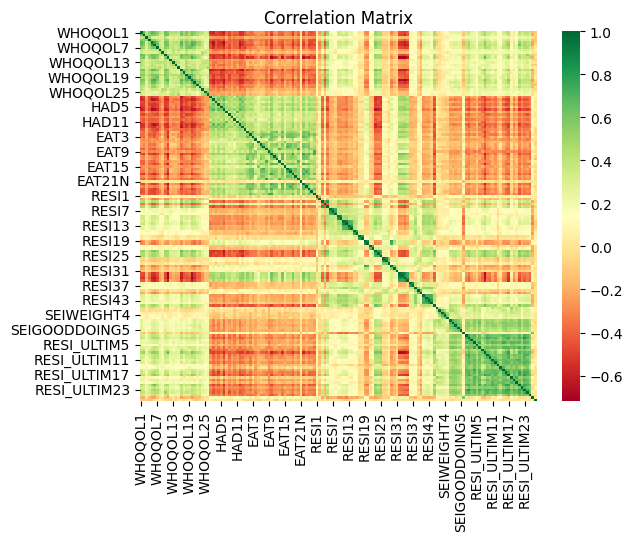

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()

# Modelos

In [58]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

### Regresión lineal

In [59]:
def linear_regresion(X_train, y_train, X_test, y_test):
  # Create an instance of the LinearRegression model with default parameters
  model = LinearRegression()

  # Define the hyperparameters to tune and their possible values
  param_grid = {
      'fit_intercept': [True, False]
  }

  # Create an instance of the GridSearchCV with the model and parameter grid
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

  # Fit the GridSearchCV to the training data
  grid_search.fit(X_train, y_train)

  # Get the best parameters
  best_params = grid_search.best_params_
  # Imprimir los mejores valores de los hiperparámetros
  print("Mejores hiperparámetros: ", best_params)

  # Create a new model instance using the best parameters
  new_model = LinearRegression(**best_params)
  new_model.fit(X_train, y_train)
  lr_pred = new_model.predict(X_test)

  return lr_pred, param_grid['fit_intercept']

## RANSAC

In [60]:
def ransac_regression(X_train, y_train, X_test, y_test, fit_intercept=True):
    model = RANSACRegressor(base_estimator=LinearRegression(fit_intercept=False), min_samples=45)
    model.fit(X_train, y_train)
    rr_pred = model.predict(X_test)

    return rr_pred

## Theil Sen

In [61]:
def theil_sen_regression(X_train, y_train, X_test, y_test):
    model = TheilSenRegressor()
    param_grid = {'fit_intercept': [True, False]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters: ", best_params)

    new_model = TheilSenRegressor(**best_params)
    new_model.fit(X_train, y_train)
    ts_pred = new_model.predict(X_test)

    return ts_pred

## HuberRegressor

In [62]:
def huber_regression(X_train, y_train, X_test, y_test):
    model = HuberRegressor()
    param_grid = {'fit_intercept': [True, False]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters: ", best_params)

    new_model = HuberRegressor(**best_params)
    new_model.fit(X_train, y_train)
    hr_pred = new_model.predict(X_test)

    return hr_pred

## SVR

In [63]:
def svr_regression(X_train, y_train, X_test, y_test):
    model = SVR()
    param_grid = {'kernel': ['linear', 'rbf', 'poly']}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters: ", best_params)

    new_model = SVR(**best_params)
    new_model.fit(X_train, y_train)
    svr_pred = new_model.predict(X_test)

    return svr_pred, new_model

## XGBoost regression

In [64]:
def xgboost_regression(X_train, y_train, X_test, y_test):
    model = XGBRegressor()
    param_grid = {'learning_rate': [0.1, 0.01, 0.001]}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    print("Best hyperparameters: ", best_params)

    new_model = XGBRegressor(**best_params)
    new_model.fit(X_train, y_train)
    xgb_pred = new_model.predict(X_test)

    return xgb_pred

# Resultados

In [51]:
columns = ['Regresión Lineal', 'RANSAC', 'Theil Sen', 'HuberRegressor', 'SVR', 'XGBoost regression']
results = pd.DataFrame(columns=columns)
results

,Regresión Lineal,RANSAC,Theil Sen,HuberRegressor,SVR,XGBoost regression


In [53]:
import matplotlib.pyplot as plt

def calculateImportance(svr, X_train):
    # Step 2: Retrieve feature weights
    feature_weights = np.abs(svr.coef_.ravel())

    # Step 3: Normalize feature weights
    normalized_weights = feature_weights / np.sum(feature_weights)

    # Step 4: Sort normalized feature weights
    sorted_indices = np.argsort(normalized_weights)[::1]
    sorted_weights = normalized_weights[sorted_indices]
    sorted_features = X_train.columns[sorted_indices]

    # Plot feature importance
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(sorted_weights)), sorted_weights, align='center')
    plt.yticks(range(len(sorted_weights)), sorted_features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.show()

## Clasificación con dataset completo

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1)
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1)
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': False}
Best hyperparameters:  {'fit_intercept': False}
Best hyperparameters:  {'fit_intercept': False}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['Completo'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

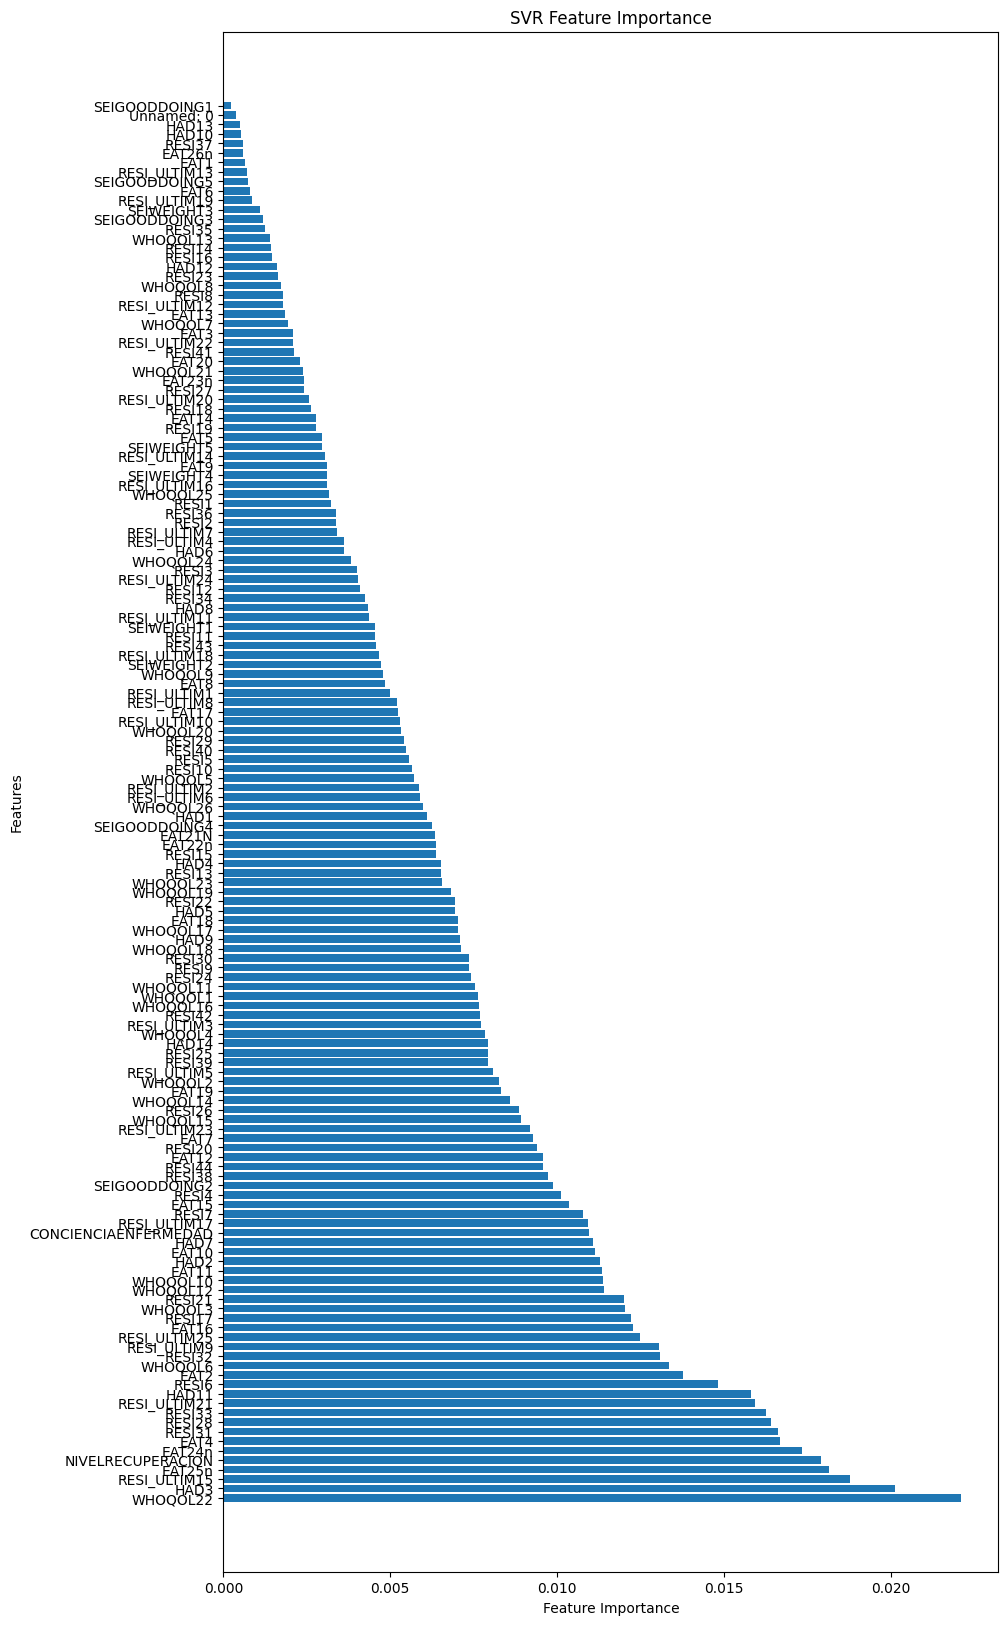

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con dataset completo (extracción de carácteristicas)

In [54]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [55]:
df_train_ec = pd.DataFrame()
df_test_ec = pd.DataFrame()

c = df_train.filter(regex='^WHOQOL').columns.tolist()
df_train_ec['WHOQOL'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^HAD').columns.tolist()
df_train_ec['HAD'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^EAT').columns.tolist()
df_train_ec['EAT'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^RESI[^_]').columns.tolist()
df_train_ec['RESI'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^SEIGOODDOING').columns.tolist()
df_train_ec['SEIGGOODDOING'] = df_train[c].sum(axis=1)
c = df_train.filter(regex='^RESI_').columns.tolist()
df_train_ec['RESI_ULTIM'] = df_train[c].sum(axis=1)
df_train_ec['NR_T2'] = df_train['NR_T2']

c = df_test.filter(regex='^WHOQOL').columns.tolist()
df_test_ec['WHOQOL'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^HAD').columns.tolist()
df_test_ec['HAD'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^EAT').columns.tolist()
df_test_ec['EAT'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^RESI[^_]').columns.tolist()
df_test_ec['RESI'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^SEIGOODDOING').columns.tolist()
df_test_ec['SEIGGOODDOING'] = df_test[c].sum(axis=1)
c = df_test.filter(regex='^RESI_').columns.tolist()
df_test_ec['RESI_ULTIM'] = df_test[c].sum(axis=1)
df_test_ec['NR_T2'] = df_test['NR_T2']

In [56]:
X_train = df_train_ec.drop(['NR_T2'], axis=1)
y_train = df_train_ec['NR_T2']
X_test = df_test_ec.drop(['NR_T2'], axis=1)
y_test = df_test_ec['NR_T2']

In [65]:
# lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
# rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
# ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
# hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
joblib.dump(svr, "svr_model.pkl")
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Best hyperparameters:  {'kernel': 'rbf'}
Best hyperparameters:  {'learning_rate': 0.01}


In [ ]:
results.loc['Completo (EC)'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

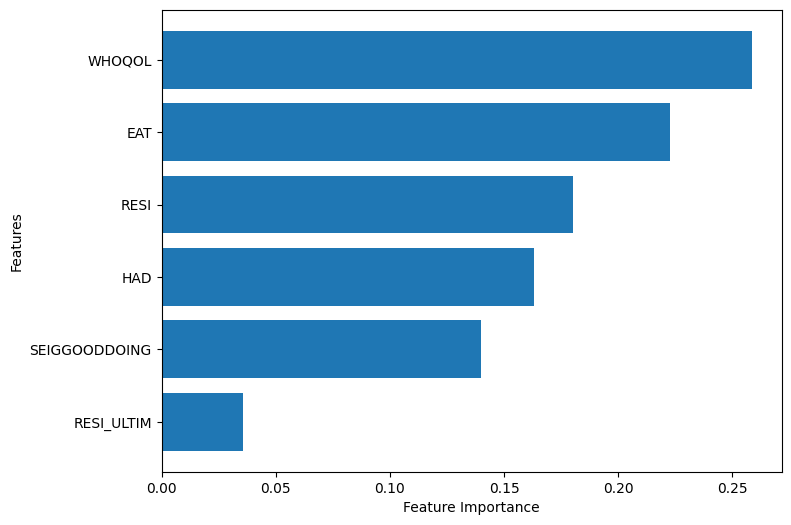

In [24]:
calculateImportance(svr, X_train)

## Clasificación con WHOQOL

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^WHOQOL')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^WHOQOL')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': False}
Best hyperparameters:  {'fit_intercept': False}
Best hyperparameters:  {'fit_intercept': False}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['WHOQOL'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

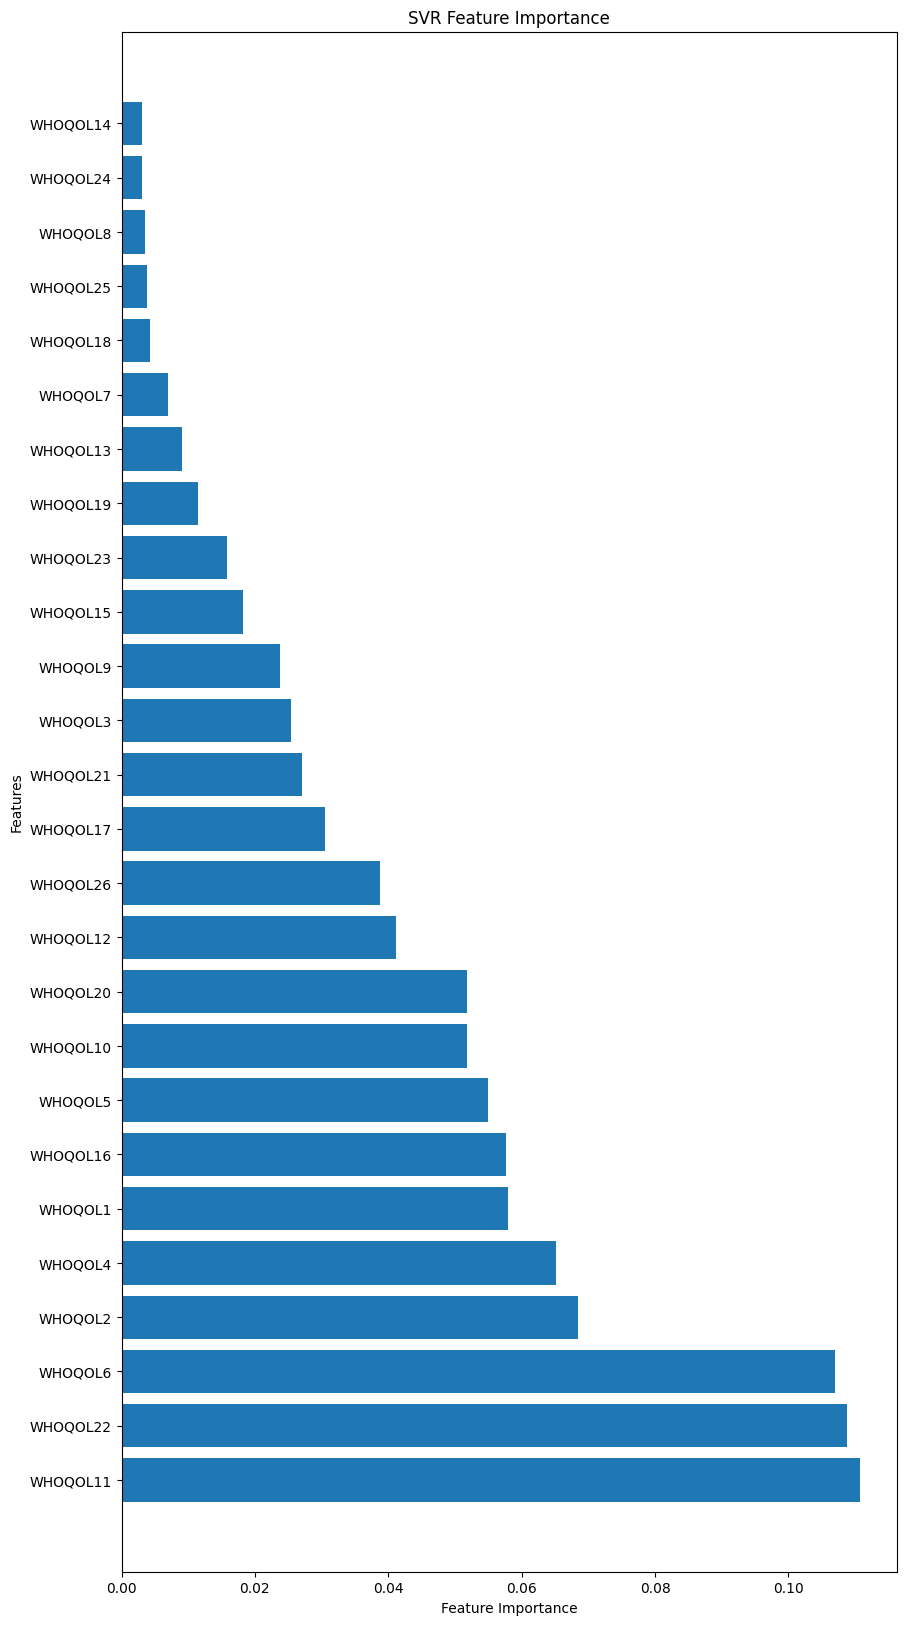

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con HAD

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^HAD')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^HAD')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['HAD'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

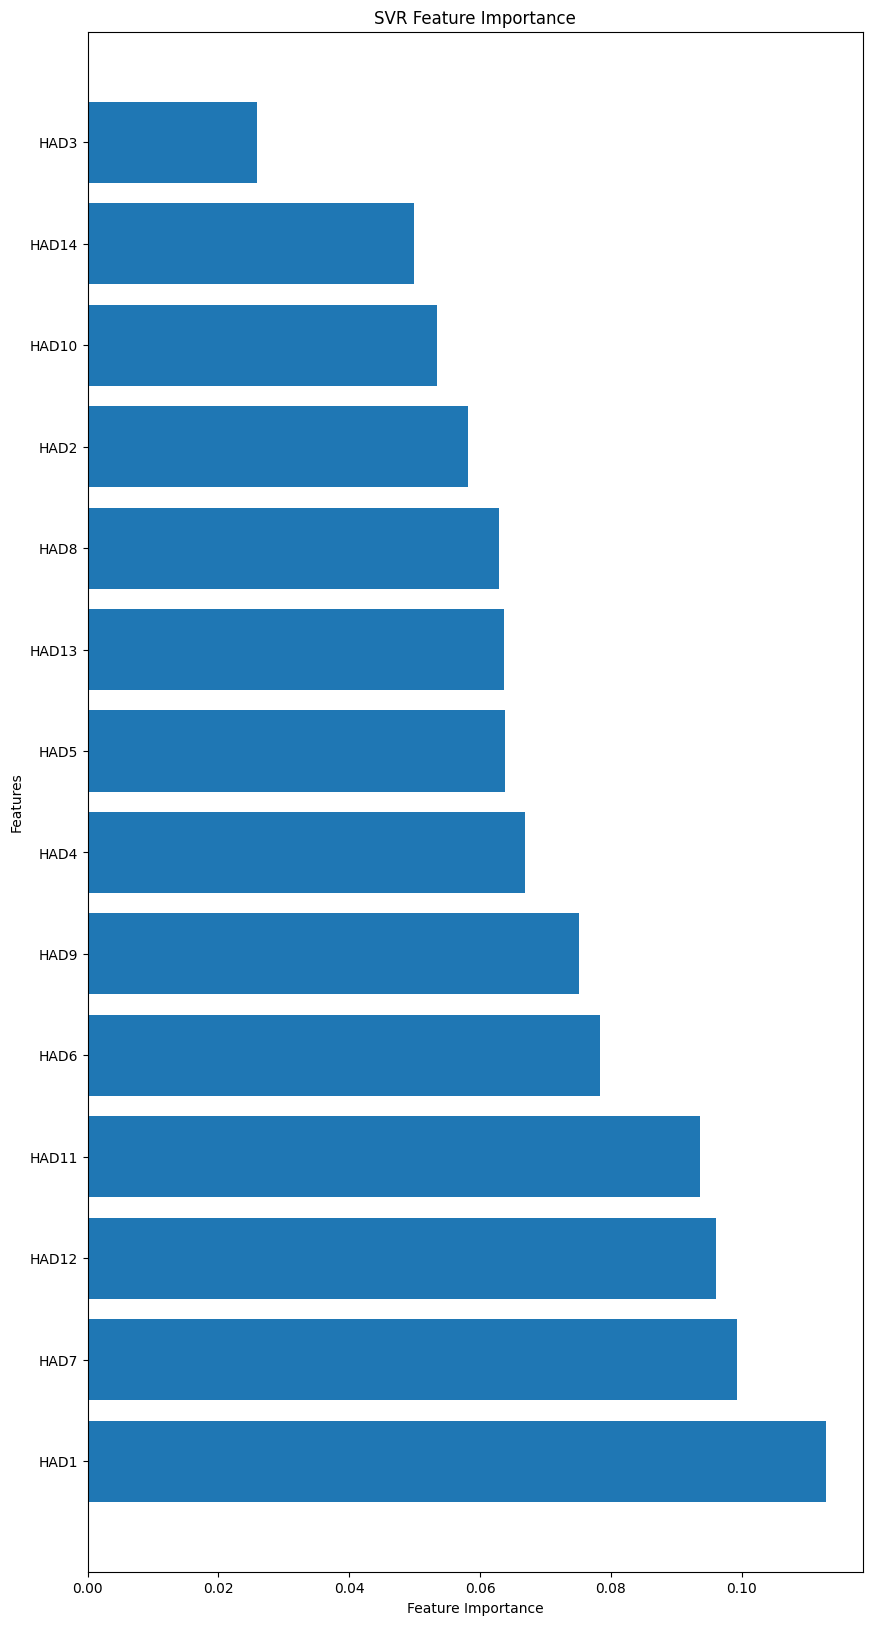

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con EAT

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^EAT')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^EAT')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['EAT'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

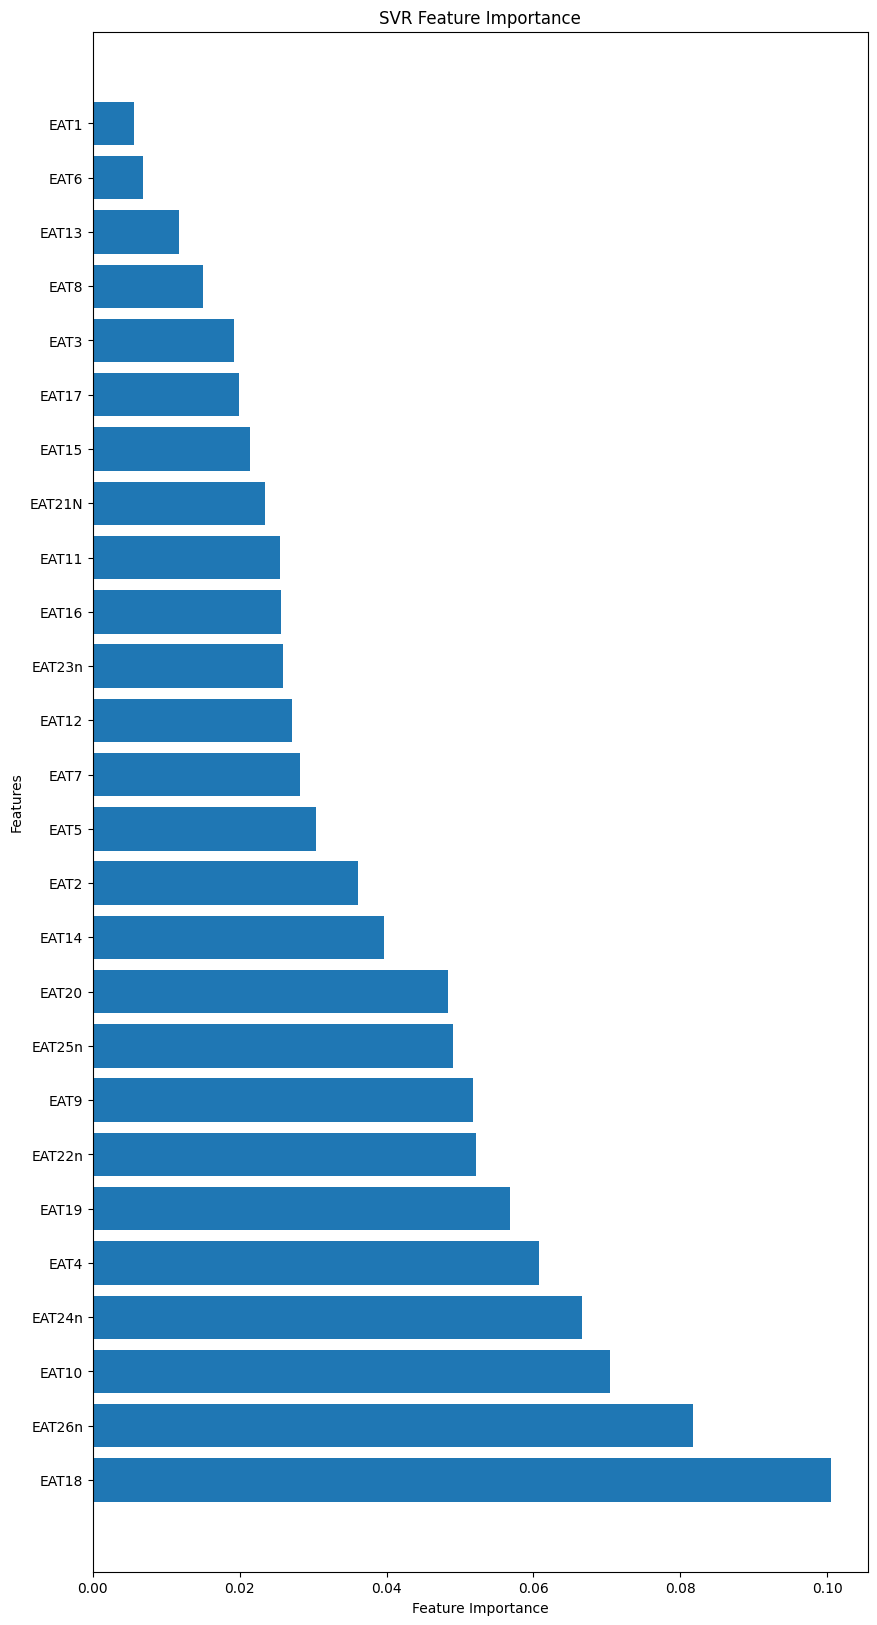

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con RESI

In [23]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^RESI[^_]')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^RESI[^_]')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['RESI'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                        r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

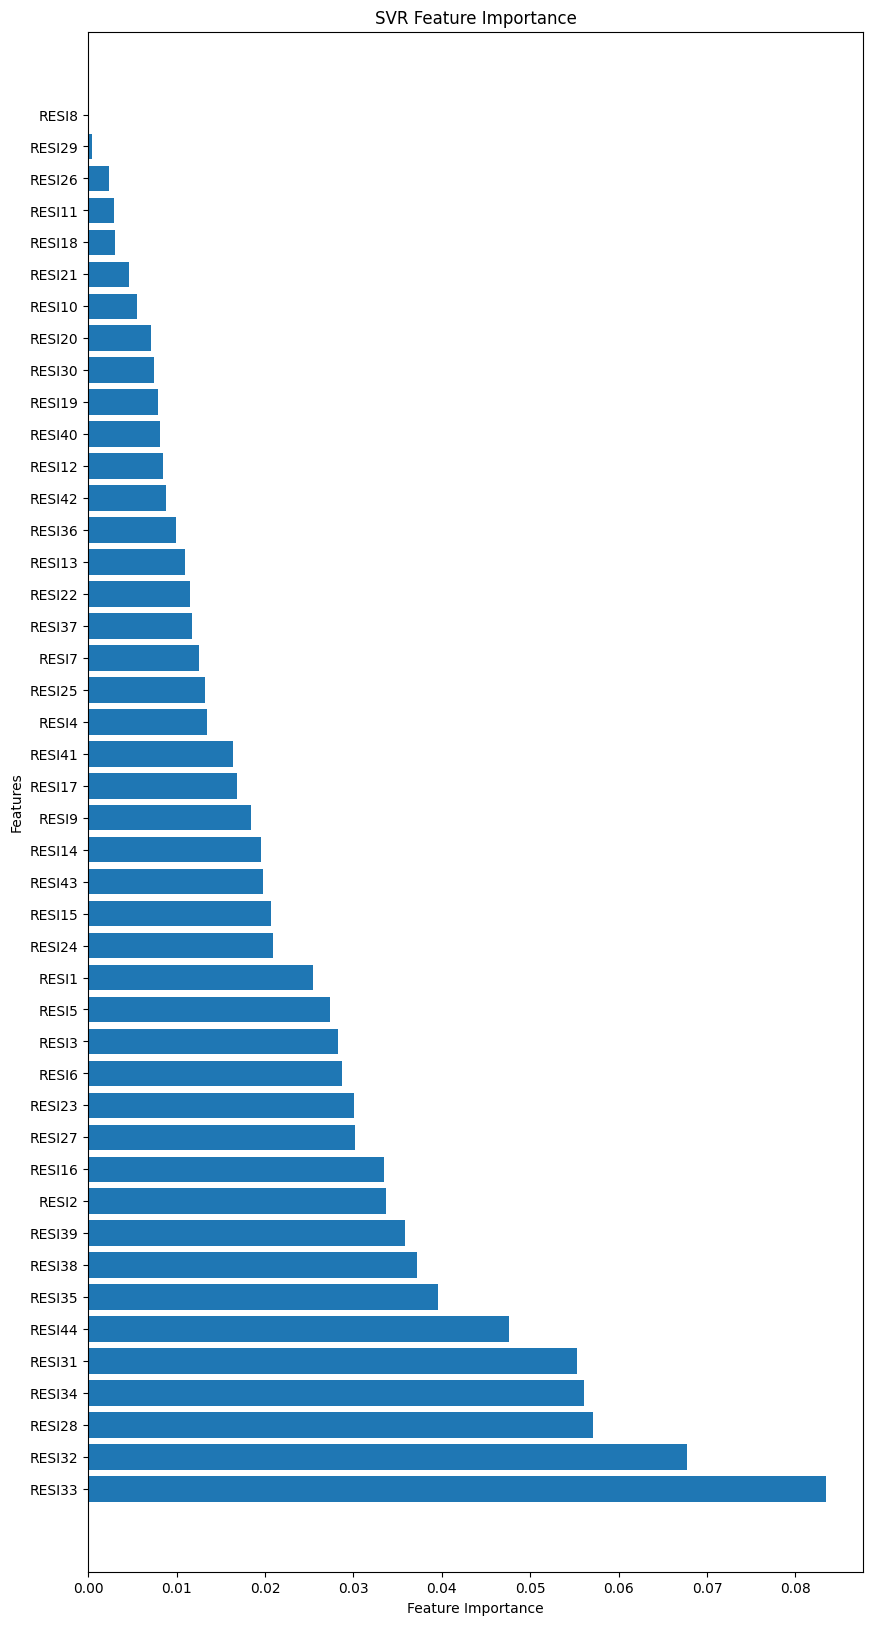

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con RED-5

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train[['RESI16', 'RESI27', 'RESI28', 'RESI30', 'RESI31']]
y_train = df_train['NR_T2']
X_test = df_test[['RESI16', 'RESI27', 'RESI28', 'RESI30', 'RESI31']]
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['RED5'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                        r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

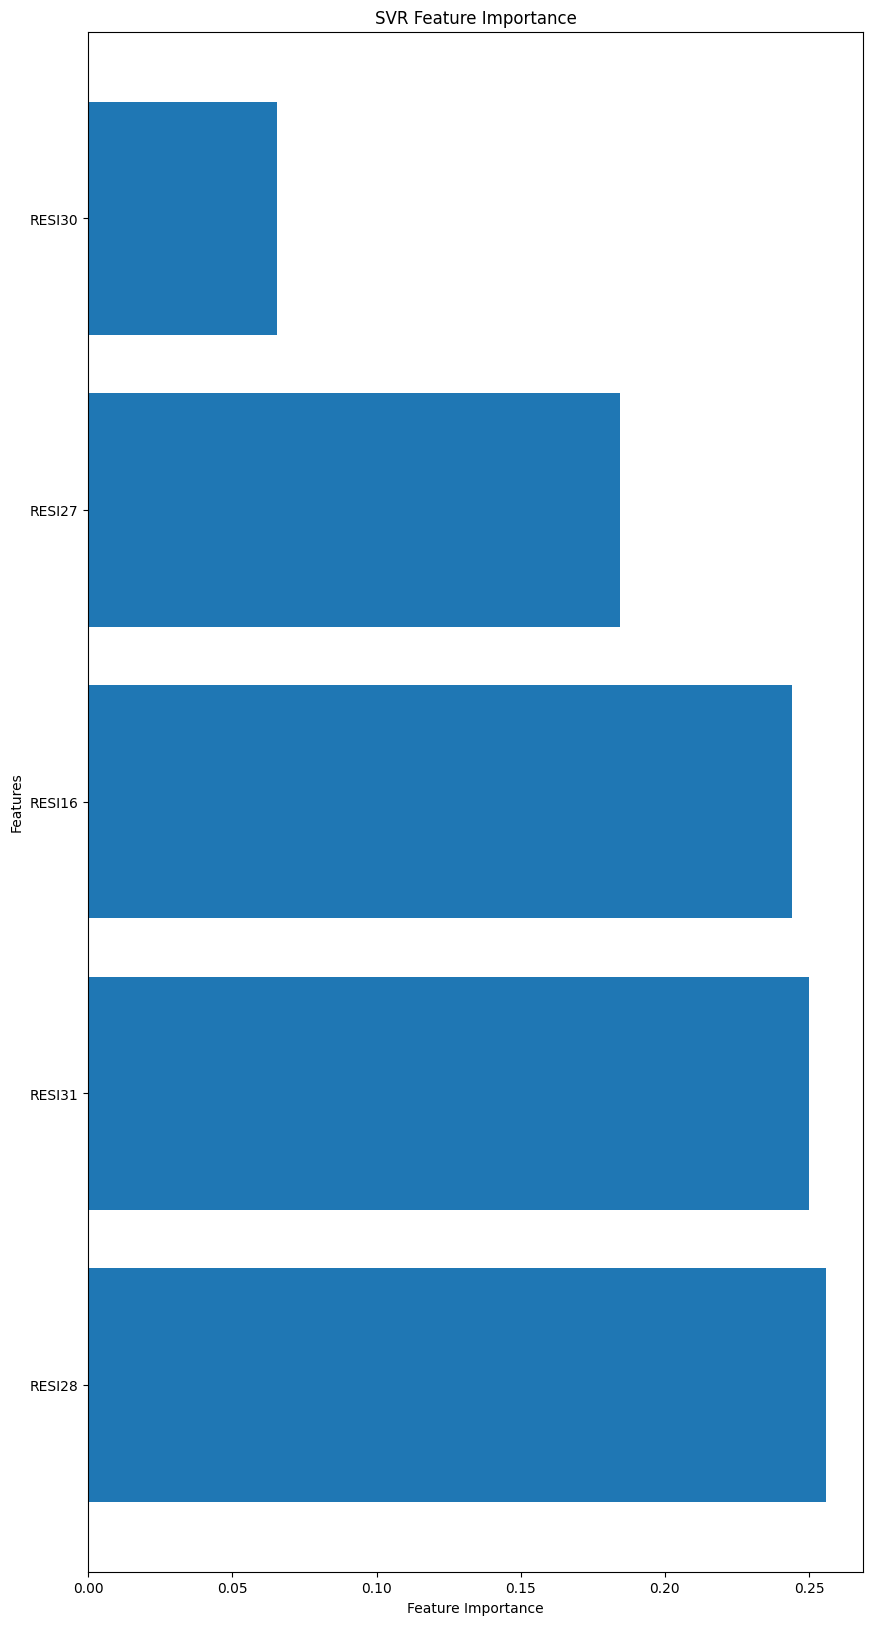

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con SEIGOODDOING

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^SEIGOODDOING')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^SEIGOODDOING')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['SEIGOODDOING'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

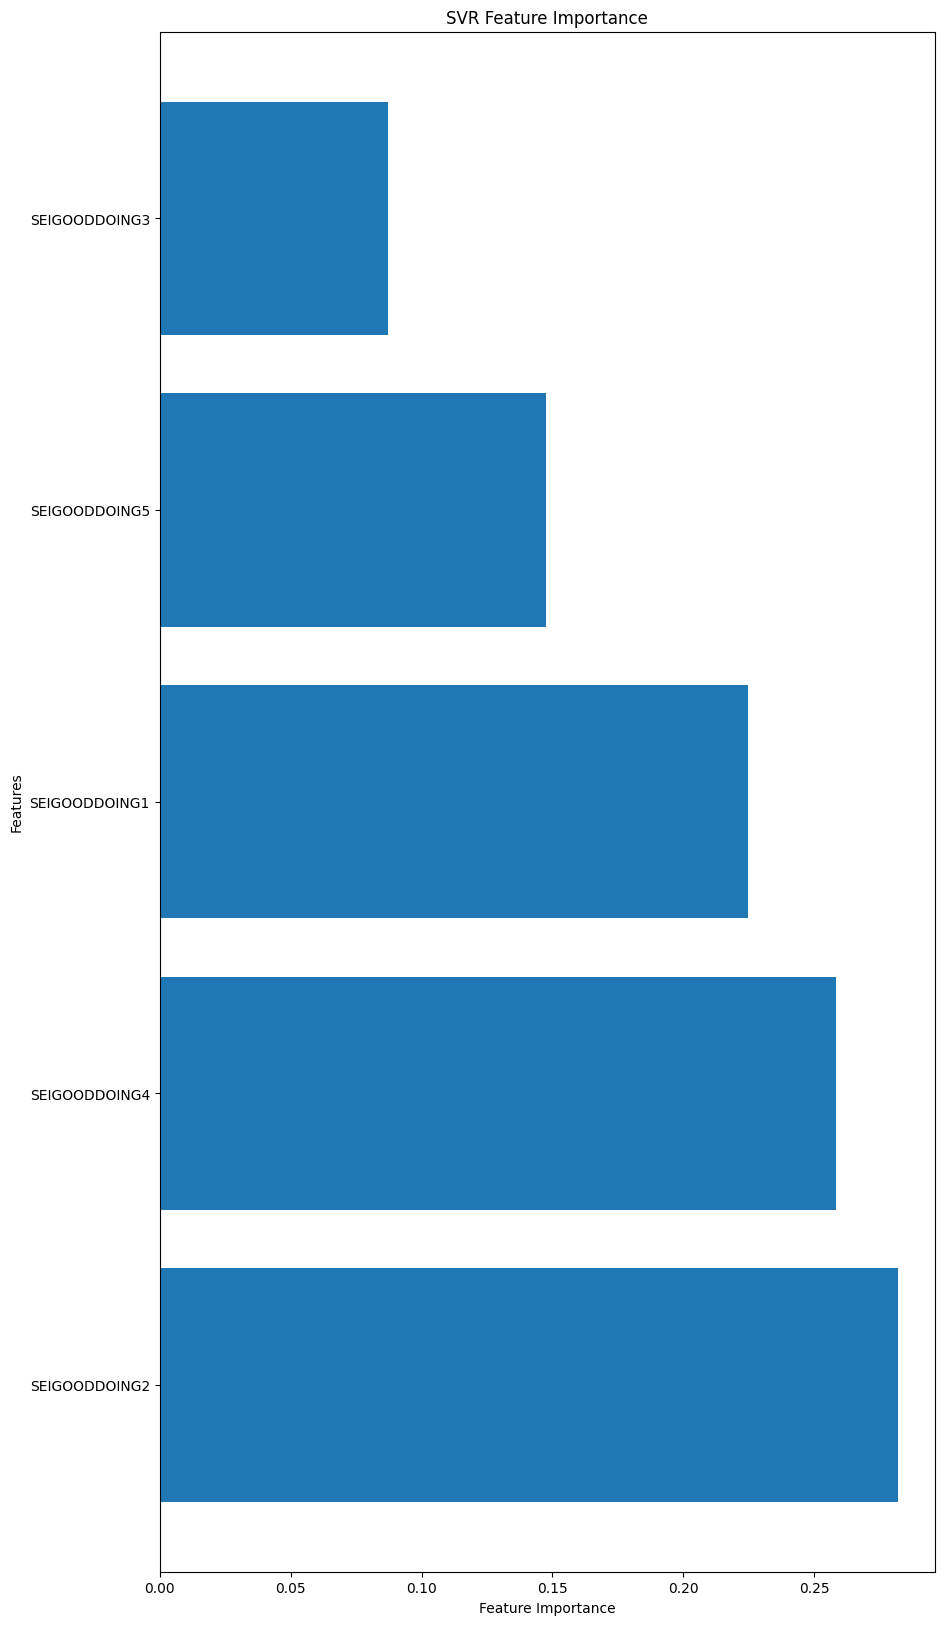

In [ ]:
calculateImportance(svr, X_train)

## Clasificación con RESI_ULT

In [ ]:
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train = df_train.drop(['NR_T2'], axis=1).filter(regex='^RESI_')
y_train = df_train['NR_T2']
X_test = df_test.drop(['NR_T2'], axis=1).filter(regex='^RESI_')
y_test = df_test['NR_T2']

In [ ]:
lr_pred, fit_intercept = linear_regresion(X_train, y_train, X_test, y_test)
rr_pred = ransac_regression(X_train, y_train, X_test, y_test, fit_intercept)
ts_red = theil_sen_regression(X_train, y_train, X_test, y_test)
hr_pred = huber_regression(X_train, y_train, X_test, y_test)
svr_pred, svr = svr_regression(X_train, y_train, X_test, y_test)
xgb_pred = xgboost_regression(X_train, y_train, X_test, y_test)

Mejores hiperparámetros:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': True}
Best hyperparameters:  {'fit_intercept': False}
Best hyperparameters:  {'kernel': 'linear'}
Best hyperparameters:  {'learning_rate': 0.1}


In [ ]:
results.loc['RESI_ULT'] = [r2_score(y_test, lr_pred), r2_score(y_test, rr_pred), r2_score(y_test, ts_red),
                           r2_score(y_test, hr_pred), r2_score(y_test, svr_pred), r2_score(y_test, xgb_pred)]

### Explainability

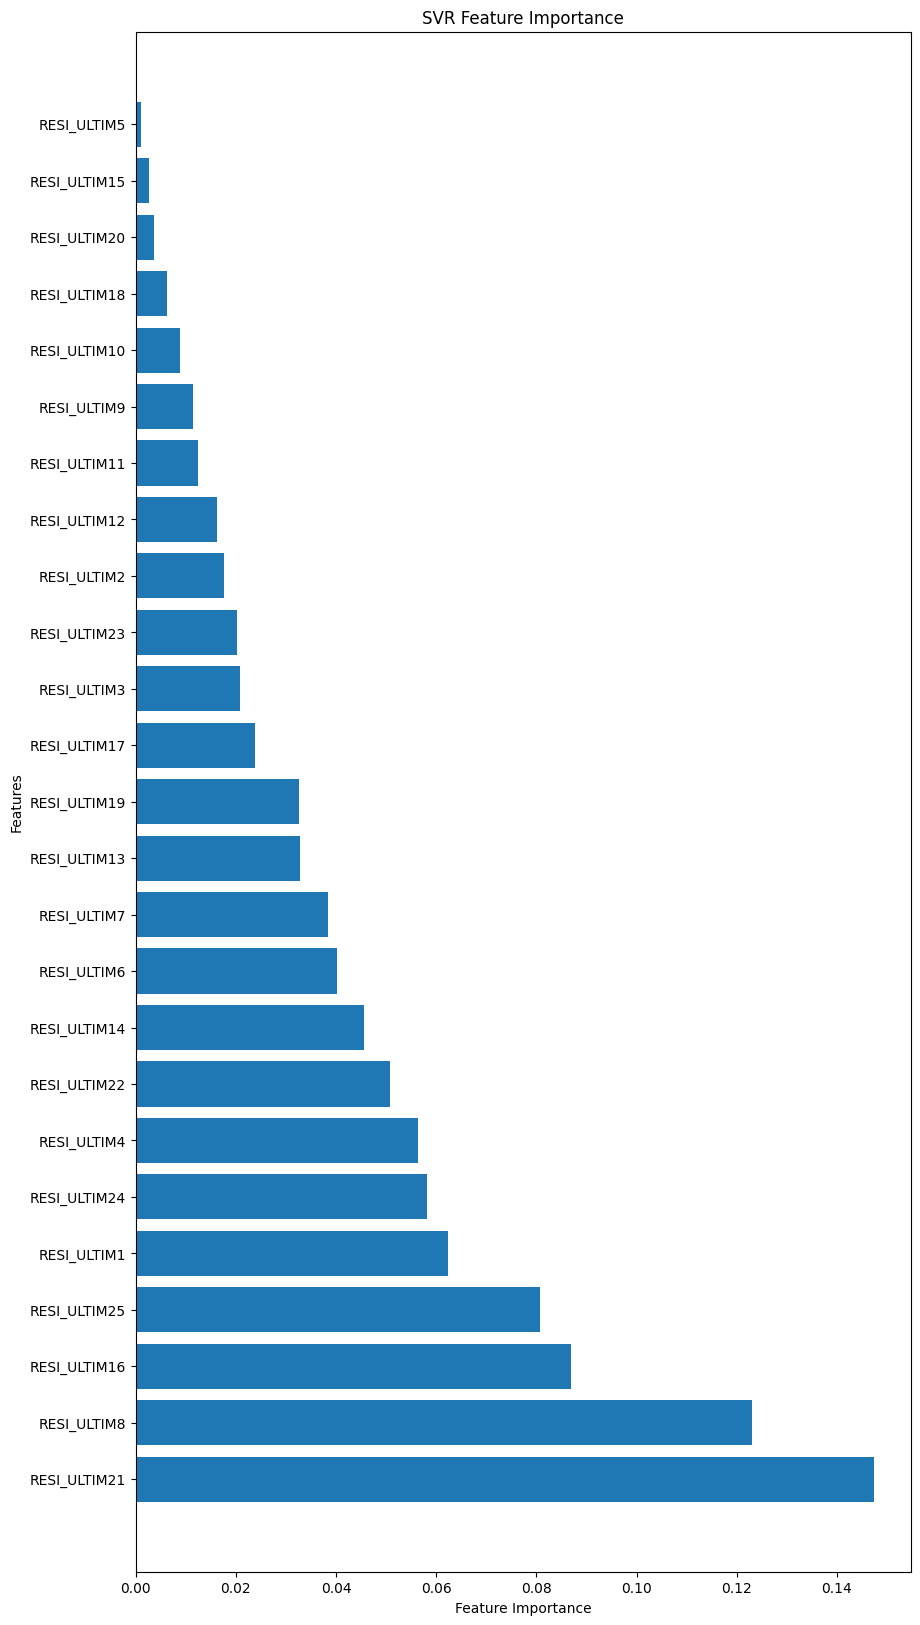

In [ ]:
calculateImportance(svr, X_train)

## Visualización y guardado

In [ ]:
results

,Regresión Lineal,RANSAC,Theil Sen,HuberRegressor,SVR,XGBoost regression
Completo,-4.727101,-0.053661,-4.727101,0.110829,0.622298,0.473775
Completo (EC),0.634222,0.561049,0.630458,0.653544,0.676294,0.639558
WHOQOL,0.302268,0.244261,0.291901,0.130455,0.549343,0.460918
HAD,0.474040,-3.257630,0.537874,0.493490,0.503749,0.293114
EAT,0.115698,-0.952031,0.170281,0.121980,0.615728,0.115925
RESI,0.210970,-3.371162,0.200863,0.237559,0.482433,-0.096034
RED5,0.234990,-2.983250,0.299529,0.257819,0.330654,-0.606464
SEIGOODDOING,0.069400,-0.238690,-0.009999,0.047598,0.122644,-1.002731
RESI_ULT,0.273093,0.074697,0.118106,0.228033,0.390242,0.125965


In [ ]:
results.to_excel('resultados/resultadosNR.xlsx', index=True)
# v1 solo linear regression r_score
# v2 el resto que dijo almeida con r_score tambien
# v3 con fit_intercept con r_score tambien
# V4 CON RED5

explainability variable individual
- probar con los data generales